In [11]:
import numpy as np
import pandas as pd 
import csv 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

from common_utils import *
import qc
from qc import *
import plotting
from plotting import *
import models
from models import *
import dmr_calling
from dmr_calling import *
from data_simulator import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
N_SAMPLES = 100  # Reduced from 100
N_CPGS = 1000   # Reduced from 5000
N_GENES = 50   # Reduced from 500
RANDOM_SEED = 42


beta_raw, depth_raw, clinical_df_raw, genes_df, cpg_ids_raw, sex_cpg_idx_set = \
    generate_cfDNA_methylation_data_with_gene_effects(
        n_samples=N_SAMPLES,
        n_cpgs=N_CPGS,
        n_genes=N_GENES,
        random_seed=RANDOM_SEED
    )

# Assign sample IDs for easier tracking
sample_ids_raw = [f'Sample_{i+1}' for i in range(N_SAMPLES)]
clinical_df_raw[CLINICAL_SAMPLE_ID_COL] = sample_ids_raw
clinical_df_raw = clinical_df_raw.set_index(CLINICAL_SAMPLE_ID_COL)
# Convert set of indices to list for check_sex_consistency
sex_cpg_indices_raw = list(sex_cpg_idx_set)

print(f"Raw Beta shape: {beta_raw.shape}")
print(f"Raw Depth shape: {depth_raw.shape}")
print(f"Raw Clinical shape: {clinical_df_raw.shape}")
print(f"Raw CpG IDs count: {len(cpg_ids_raw)}")
print(f"Genes DF shape: {genes_df.shape}")
print(f"Number of designated sex CpGs: {len(sex_cpg_indices_raw)}")

Raw Beta shape: (100, 1000)
Raw Depth shape: (100, 1000)
Raw Clinical shape: (100, 6)
Raw CpG IDs count: 1000
Genes DF shape: (1000, 2)
Number of designated sex CpGs: 12


/Users/alvinshi/Library/CloudStorage/Dropbox/Interview_prep/HeptaBio/dmr_calling.py:15: UserWarning: Running without rpy2. Using Python-only implementations.
  


Raw Beta shape: (100, 1000)
Raw Depth shape: (100, 1000)
Raw Clinical shape: (100, 6)
Raw CpG IDs count: 1000
Genes DF shape: (1000, 2)
Number of designated sex CpGs: 12

--- Plotting Initial Data Distributions ---


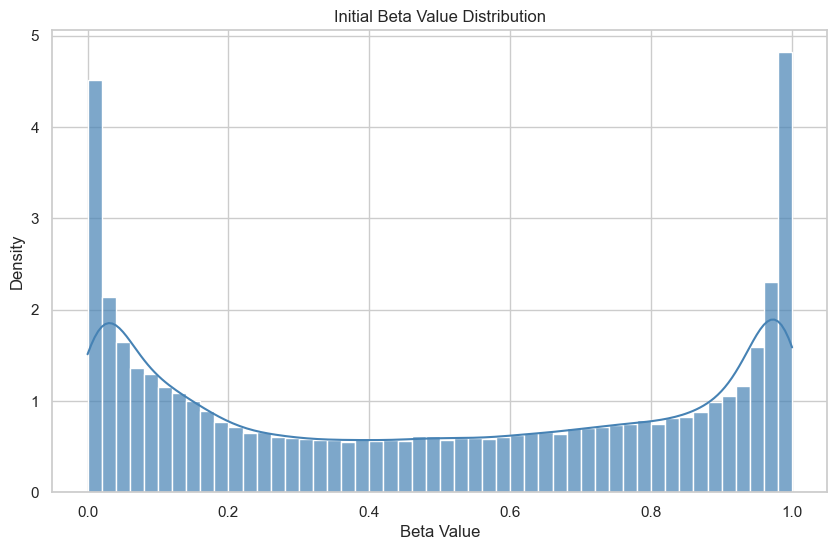

/Users/alvinshi/Library/CloudStorage/Dropbox/Interview_prep/HeptaBio/plotting.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.Axes: The Matplotlib axes object containing the plot.


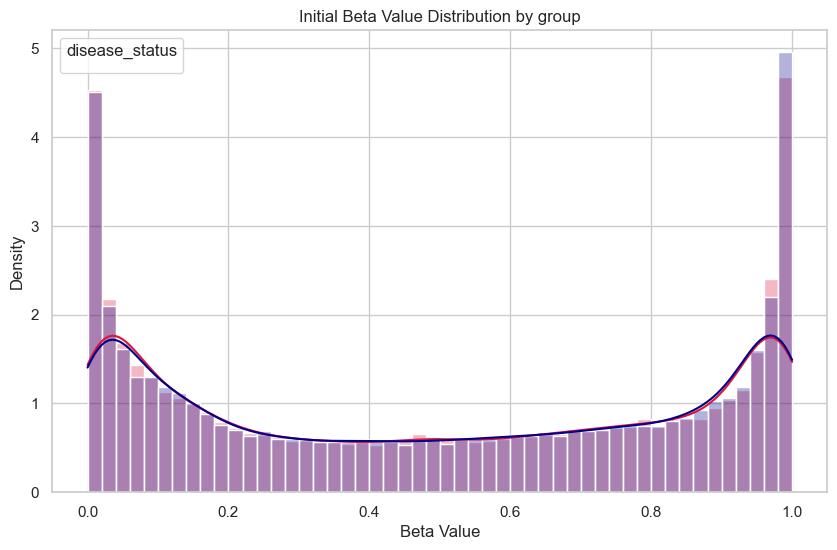

In [22]:

print(f"Raw Beta shape: {beta_raw.shape}")
print(f"Raw Depth shape: {depth_raw.shape}")
print(f"Raw Clinical shape: {clinical_df_raw.shape}")
print(f"Raw CpG IDs count: {len(cpg_ids_raw)}")
print(f"Genes DF shape: {genes_df.shape}")
print(f"Number of designated sex CpGs: {len(sex_cpg_indices_raw)}")

# --- 2. Initial Data Visualization ---
print("\n--- Plotting Initial Data Distributions ---")

# Beta distribution
fig_beta_raw, ax_beta_raw = plt.subplots(figsize=(10, 6))
plotting.plot_beta_distribution(
    beta_raw,
    ax=ax_beta_raw
)

ax_beta_raw.set_title("Initial Beta Value Distribution")
plt.show()

fig_beta_raw, ax_beta_raw = plt.subplots(figsize=(10, 6))
plotting.plot_beta_distribution(
    beta_raw,
    ax=ax_beta_raw,
    group_labels=clinical_df_raw[CLINICAL_DISEASE_COL],
    group_name=CLINICAL_DISEASE_COL,
    alpha = 0.3
)

ax_beta_raw.set_title("Initial Beta Value Distribution by group")
plt.show()


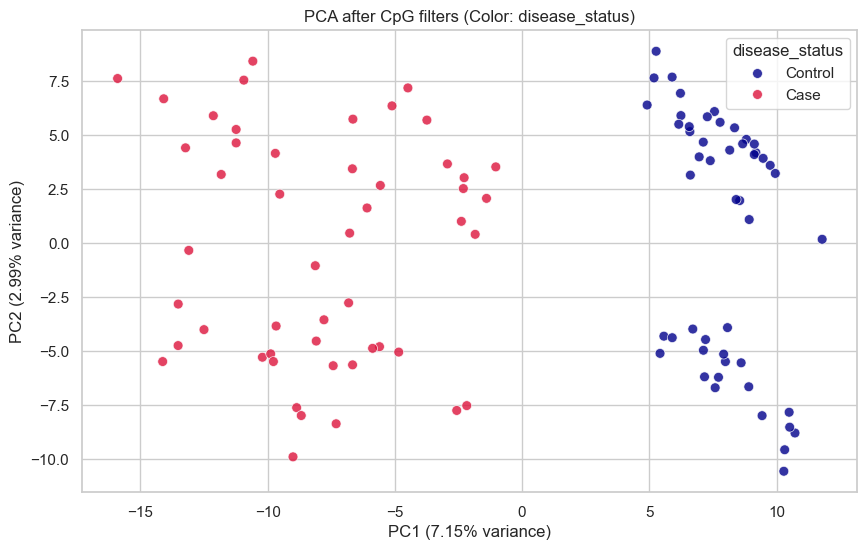

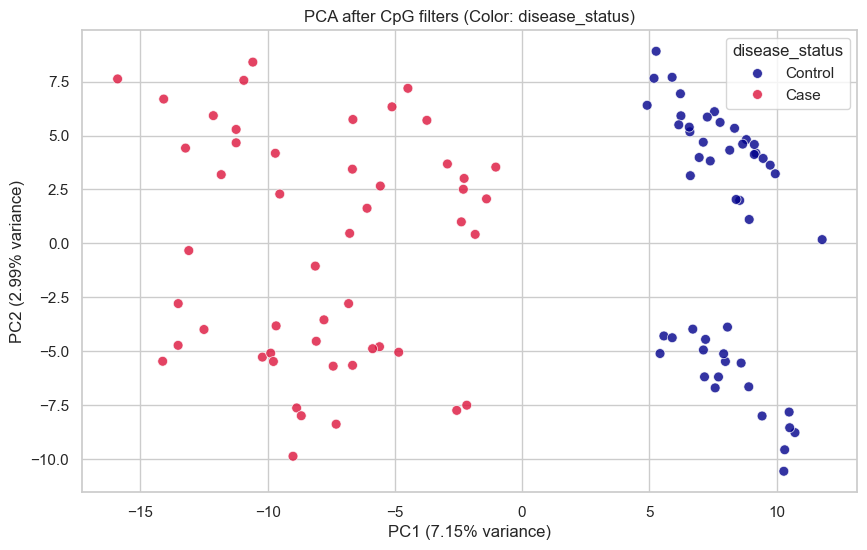

In [33]:
fig_beta_raw, ax_beta_raw = plt.subplots(figsize=(10, 6))
# PCA colored by Disease Status
plotting.plot_pca(
    beta_raw, # Use final filtered beta
    clinical_df_raw,
    color_by=CLINICAL_DISEASE_COL,
    use_m_values=True, # Convert to M-values internally
    scale_data=True,   # Scale M-values
    ax=ax_beta_raw
)
ax_beta_raw.set_title(f"PCA after CpG filters (Color: {CLINICAL_DISEASE_COL})")
plt.show()
